In [69]:
%matplotlib inline

In [70]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

import os
from skimage import io
from natsort import natsorted, ns

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import img_as_uint
from skimage import morphology
from scipy import ndimage as ndi
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage.filters import gaussian
from skimage.transform import resize
from skimage import util 




In [71]:
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
#for GAC


In [72]:
path = 'C:/Users/Dell/Documents/COURSE 1/PROJEKT/code/0/'

In [73]:
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    #print(img.shape[:2])
    #print(h,w)
    aspect = w/h # if on Python 2, you might need to cast as a float: float(w)/h
    #print(aspect)
    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3
        #padColor = cv2.BORDER_REPLICATE

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])
#borderType=cv2.BORDER_REPLICATE 
    return scaled_img


def ReduceGrey(img):
    img[np.where(((image>[70, 70, 70]) & (image <[245, 245, 245])).all(axis=2))] = [255,255,255]
    return img

def SelectAndCutBlackObject(img):
    
    indices = np.where(img < [20])
    minimum_y = np.amin(indices[0]-2) 
    maximum_y = np.amax(indices[0]+2) 
    minimum_x = np.amin(indices[1]-2) 
    maximum_x = np.amax(indices[1]+2) 
    deer = img[minimum_y:maximum_y, minimum_x:maximum_x]
    return deer

In [75]:
for f in os.listdir(path):
    filename, fext = os.path.splitext(f)
 
    image = cv2.imread(path+filename+fext)
    #print(filename)
   
    new_image = ReduceGrey(image)
    new_image = SelectAndCutBlackObject(new_image)
    new_image = resizeAndPad(new_image,(600,600))

    cv2.imwrite('C:/Users/Dell/Documents/COURSE 1/PROJEKT/code/1/{}.png'.format(filename), new_image)


2-13-4
2-14-2-4
2-17-1
2-24-3
2-24-6
2-24-7
2-4-6
3-18-12
4-1-20
5-8-b-4
6-12-1
6-8-5
7-4-5


In [76]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store

In [80]:

#gimage = inverse_gaussian_gradient(deer_float, alpha=100.0, sigma=5.0)
def GAC(image):
    
    deer_gray = rgb2gray(image)#RGB to gray
    
    deer_float = img_as_float(deer_gray)
    gimage = inverse_gaussian_gradient(deer_float, alpha=137.0, sigma=3.5) #gaus
    
    # Initial level set
    init_ls = np.zeros(deer_gray.shape, dtype=np.int8)
    init_ls[10:-10, 10:-10] = 1
    # List with intermediate results for plotting the evolution
    evolution = []
    callback = store_evolution_in(evolution)
    ls = morphological_geodesic_active_contour(gimage, 
                                               num_iter=400,
                                               init_level_set=init_ls,
                                               smoothing=1, 
                                               balloon=-1,
                                               threshold=0.70,
                                               iter_callback=callback)
    
    fig = plt.figure(figsize=(11, 11))
    axis = plt.subplot()
    plt.axis('off')
    #fig.set_size_inches(600, 600) после создания изображения
   

    #ax[0].imshow(image, cmap="gray")
    #ax[0].set_axis_off()
    #ax[0].contour(ls, [0.5], colors='r')
    #ax[0].set_title("Morphological ACWE segmentation", fontsize=12)
    
    
    plt.imshow(ls, cmap="gray")
    #plt.contour(evolution[300], [0.5], colors='y')
    plt.contour(evolution[-1], [0.65], colors='black')

    gac = plt.show()
    fig.savefig("C:/Users/Dell/Documents/COURSE 1/PROJEKT/code/2/" + filename +".png",bbox_inches='tight', pad_inches=0)
    return gac


In [81]:
path2 = 'C:/Users/Dell/Documents/COURSE 1/PROJEKT/code/1/'

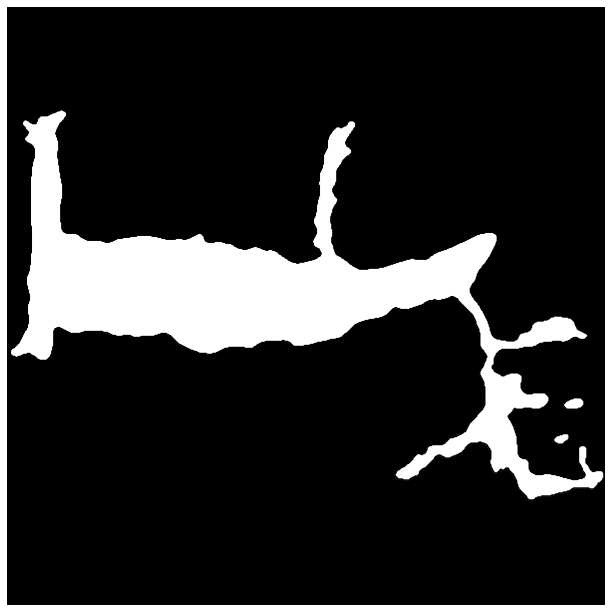

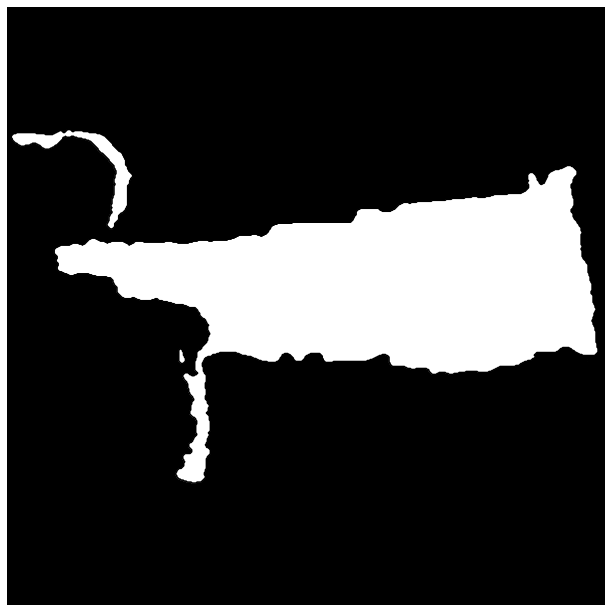

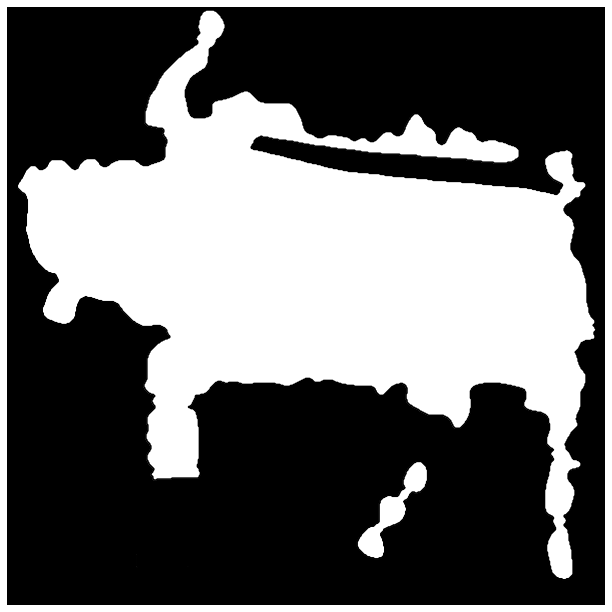

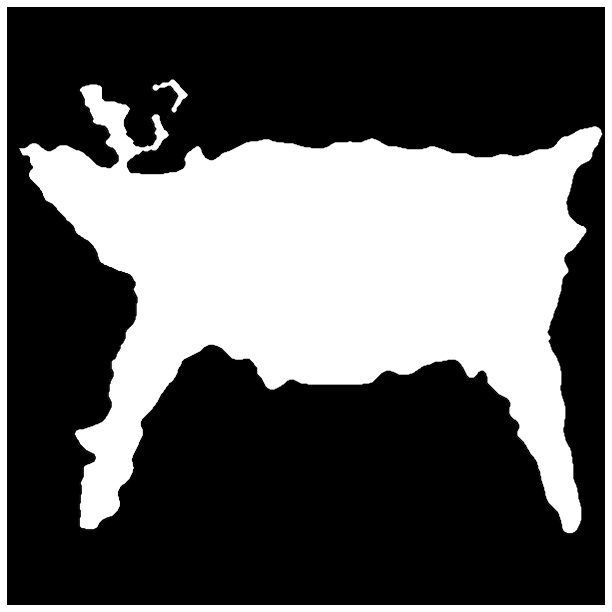

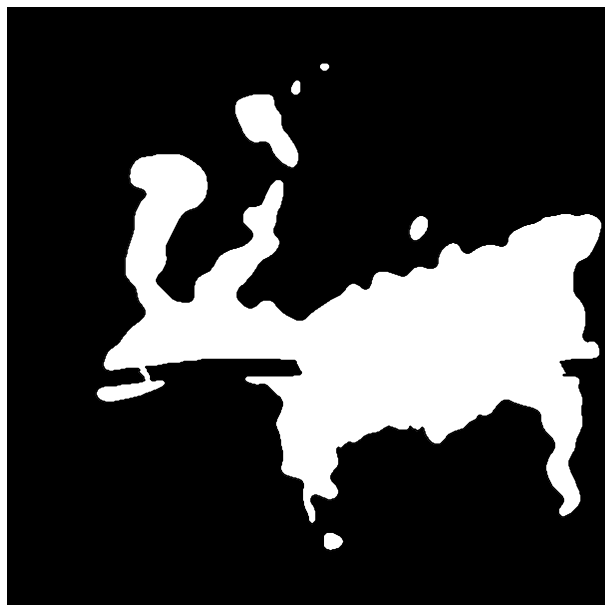

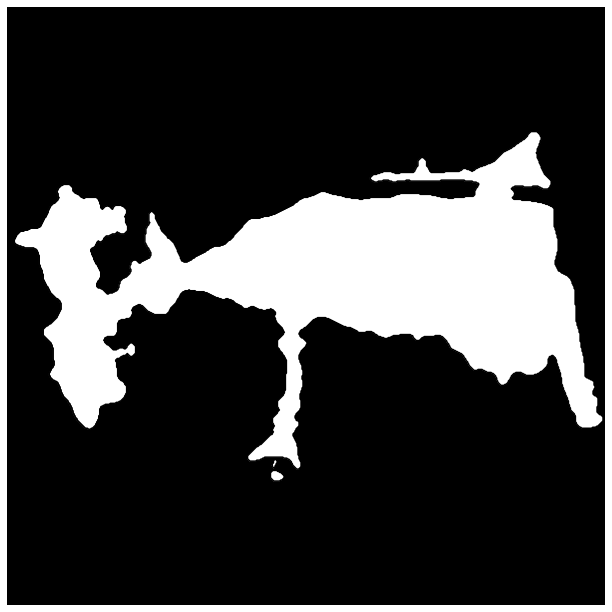

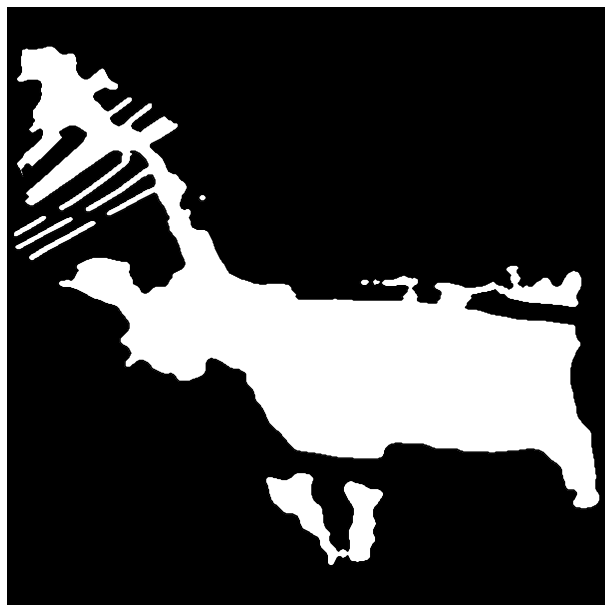

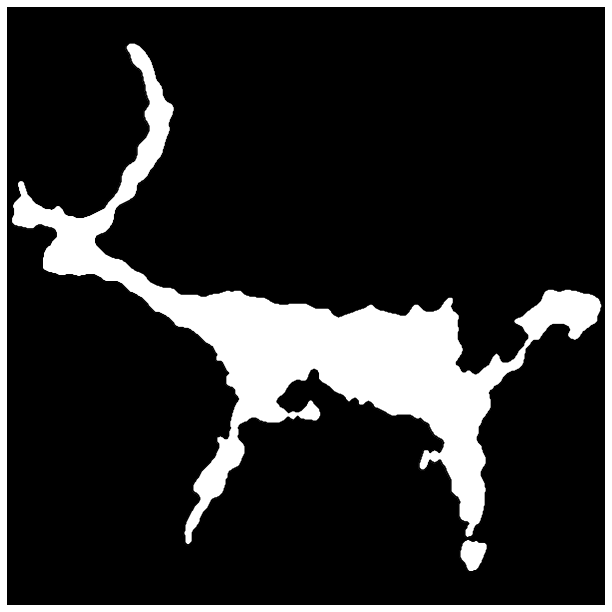

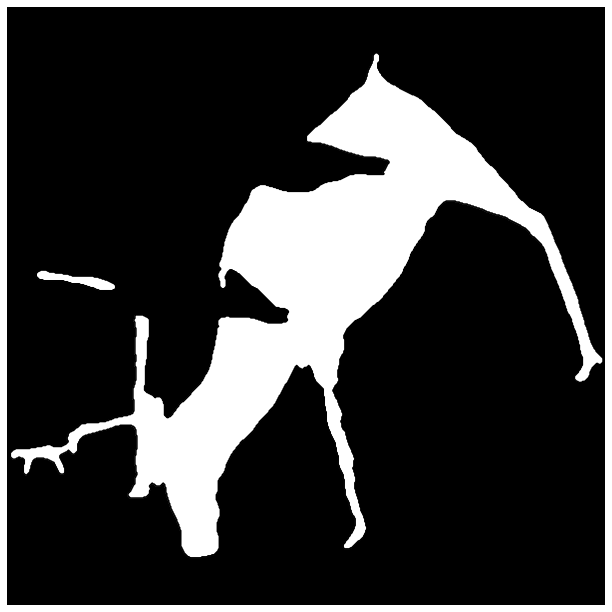

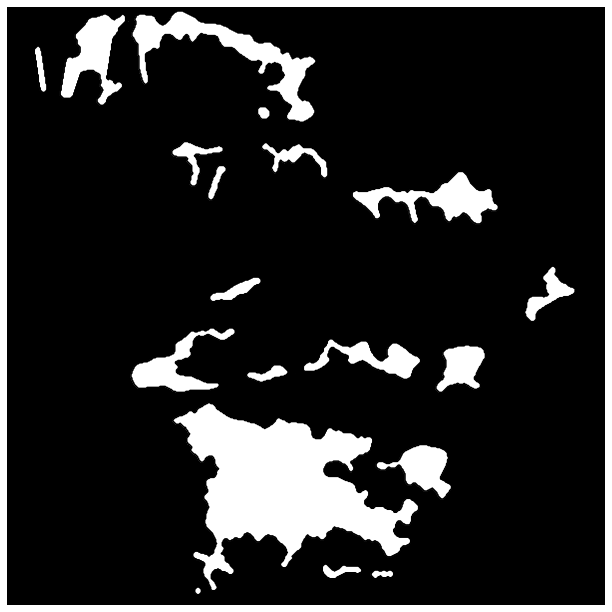

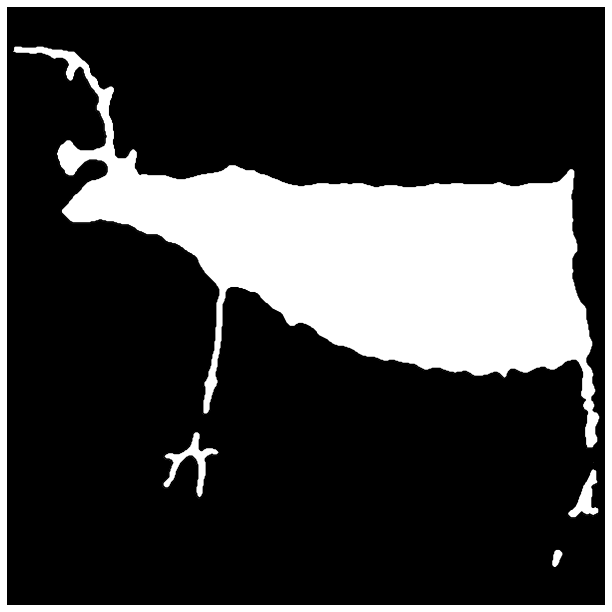

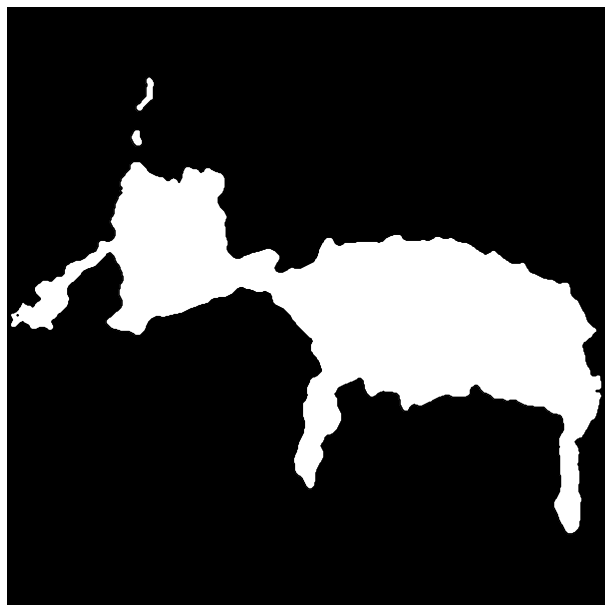

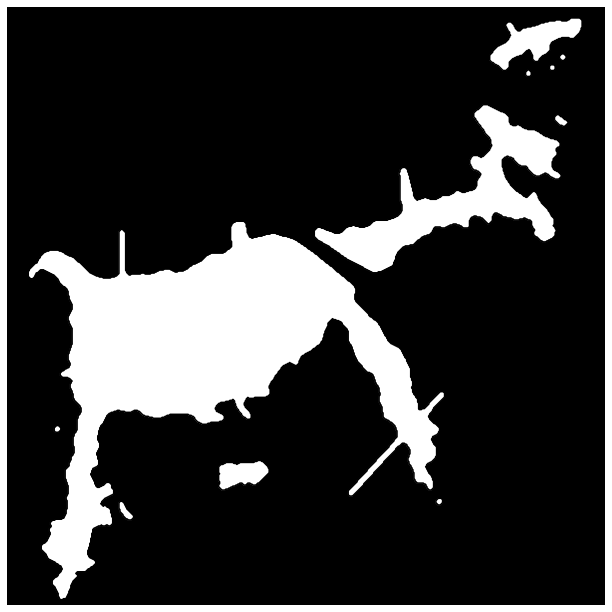

In [82]:
for f in os.listdir(path2):
    filename, fext = os.path.splitext(f)
 
    image = cv2.imread(path2+filename+fext)
    
    gac_image = GAC(image)

In [83]:
def inv(img):
    inverted_img = util.invert(img)
    #invert = np.invert(image) - как вариант
    #invert = cv2.bitwise_not(image) 
    return inverted_img

In [84]:
path3 = 'C:/Users/Dell/Documents/COURSE 1/PROJEKT/code/2/'

In [85]:
for f in os.listdir(path3):
    filename, fext = os.path.splitext(f)
    image = cv2.imread(path3+filename+fext)
    
    final_img = inv(image)
    cv2.imwrite('C:/Users/Dell/Documents/COURSE 1/PROJEKT/code/3/{}.png'.format(filename), final_img)

In [ ]:
#invert = np.invert(1-image)